[[-180.   65.]
 [-120.   65.]
 [ -60.   65.]
 [   0.   65.]
 [  60.   65.]
 [ 120.   65.]
 [-180.   30.]
 [-135.   30.]
 [ -90.   30.]
 [ -45.   30.]
 [   0.   30.]
 [  45.   30.]
 [  90.   30.]
 [ 135.   30.]
 [-180.    0.]
 [-135.    0.]
 [ -90.    0.]
 [ -45.    0.]
 [   0.    0.]
 [  45.    0.]
 [  90.    0.]
 [ 135.    0.]
 [-180.  -30.]
 [-120.  -30.]
 [ -60.  -30.]
 [   0.  -30.]
 [  60.  -30.]
 [ 120.  -30.]
 [   0.    0.]]


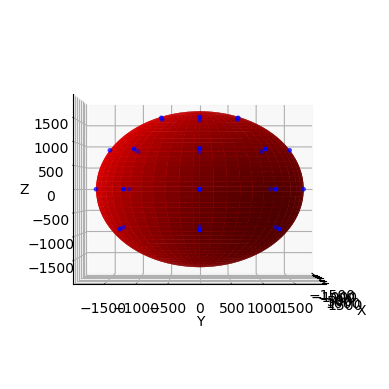

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Radius of the sphere
r = 1737.4

# Sample 2D array of longitudes and latitudes in degrees
img_num = 29
long_lat_array = np.zeros([img_num,2])
for i in range(img_num):
    if i < 6:
        long_lat_array[i,0] = -180 + (60*i)
        long_lat_array[i,1] = 65
    if 6 <= i < 14:
        long_lat_array[i,0] = -180 + (45*(i-6))
        long_lat_array[i,1] = 30
    if 14 <= i < 22:
        long_lat_array[i,0] = -180 + (45*(i-14))
        long_lat_array[i,1] = 0
    if 22 <= i < 28:
        long_lat_array[i,0] = -180 + (60*(i-22))
        long_lat_array[i,1] = -30

print(long_lat_array)

# Convert from degrees to radians to use in np functions
longitudes = np.radians(long_lat_array[:, 0])
latitudes = np.radians(long_lat_array[:, 1])

# Convert long and lat to Cartesian coordinates
x = r * np.cos(latitudes) * np.cos(longitudes)
y = r * np.cos(latitudes) * np.sin(longitudes)
z = r * np.sin(latitudes)

# Plotting the sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='b', s=6)  # Plot points
ax.view_init(elev=0., azim=0)

# Drawing the surface of the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = r * np.outer(np.cos(u), np.sin(v))
y_sphere = r * np.outer(np.sin(u), np.sin(v))
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=1.0)

# Labeling the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [45]:
!pip install plotly


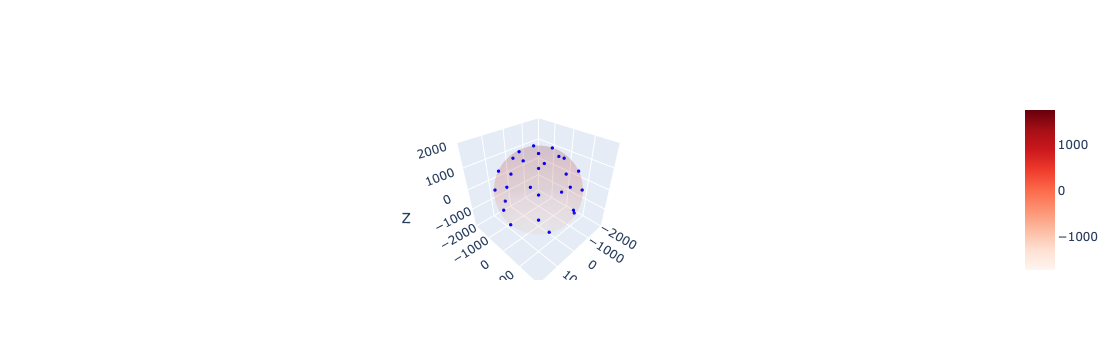

In [26]:
import plotly.graph_objects as go

# Plot points onto sphere
scatter = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2, color='blue'))

# Drawing the surface of the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
x_sphere = r * np.outer(np.cos(u), np.sin(v))
y_sphere = r * np.outer(np.sin(u), np.sin(v))
z_sphere = r * np.outer(np.ones(np.size(u)), np.cos(v))

surface = go.Surface(x=x_sphere, y=y_sphere, z=z_sphere, opacity=0.1, colorscale='reds')
axlim = 2000
fig = go.Figure(data=[scatter, surface])
fig.update_layout(scene=dict(
                    xaxis = dict(nticks=4, range=[-axlim,axlim],),
                    yaxis = dict(nticks=4, range=[-axlim,axlim],),
                    zaxis = dict(nticks=4, range=[-axlim,axlim],),
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'))
fig.show()
